In [1]:
from networkunit import models, tests, scores
import quantities as pq

/home/rgutzen/anaconda3/envs/networkunit/lib/python3.8/site-packages/elephant/parallel/__init__.py:47: UserWarning: mpi4py package is missing. Please run 'pip install mpi4py' in a terminal to activate MPI features.
  warnings.warn("mpi4py package is missing. Please run 'pip install mpi4py' "


### Define models

In [2]:
model_A = models.stochastic_activity('model A', size=100, rate=5*pq.Hz)
model_B = models.stochastic_activity('model B', size=100, rate=6*pq.Hz)
# see model class definition for more options

### Define test

In [3]:
class firing_rate_test(tests.TestM2M, tests.firing_rate_test):
    score_type = scores.ks_distance # <- attach score statistic

FR = firing_rate_test()

### Compare models via test measure

In [4]:
score = FR.judge([model_A, model_B])
# score is a 2x2 matrix with the A vs. B comparison in the off diagonal
score.iloc[0,1]



Kolmogorov-Smirnov-Distance
	datasize: 100 	 100
	D_KS = 0.840 	 p value = 3.74e-36


### Access the test measures

In [9]:
fr_prediction = FR.generate_prediction(model_A)
fr_prediction

array([4.4, 5. , 4.5, 3.4, 5.2, 4.3, 6. , 4.7, 5.3, 4.7, 5. , 5. , 6. ,
       4.1, 5.2, 4.1, 4.7, 6.7, 3.7, 5.4, 4.6, 5.8, 3.5, 3.6, 5.3, 5.1,
       5.3, 5.2, 4.1, 6.7, 4.4, 4.5, 5.6, 4.3, 5. , 5. , 4.4, 4.6, 4.8,
       5.8, 5.9, 4.3, 5.2, 5.9, 4.5, 6.9, 3.6, 6.1, 4.4, 5.3, 4.2, 5.7,
       4.4, 4.3, 4.8, 4.3, 4.5, 5.9, 4.2, 3.6, 5.5, 6.6, 3.9, 4.9, 4.8,
       4.4, 5.6, 4.7, 5.7, 5.6, 4.6, 4.8, 5.8, 4.8, 5.9, 4.8, 5.2, 5.3,
       3.9, 4.4, 4.1, 5.1, 5.8, 4.1, 5.3, 4.3, 3.9, 5.7, 4.8, 4.4, 5.6,
       4.5, 3.7, 4.8, 4.6, 5. , 5.1, 4.1, 4.3, 6.5])

### Visualize test

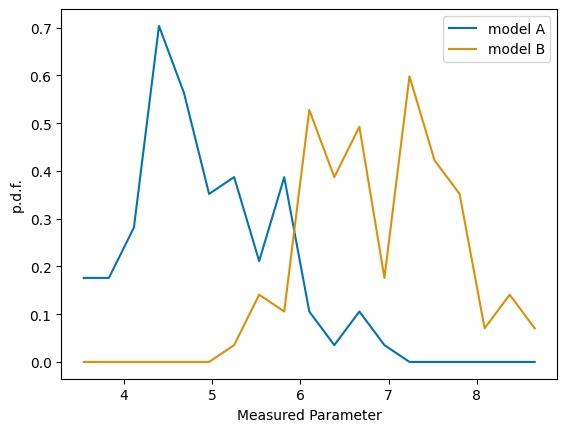

In [6]:
FR.visualize_samples(model_A, model_B, bins=20)

<Axes: xlabel='Measured Parameter', ylabel='CDF'>

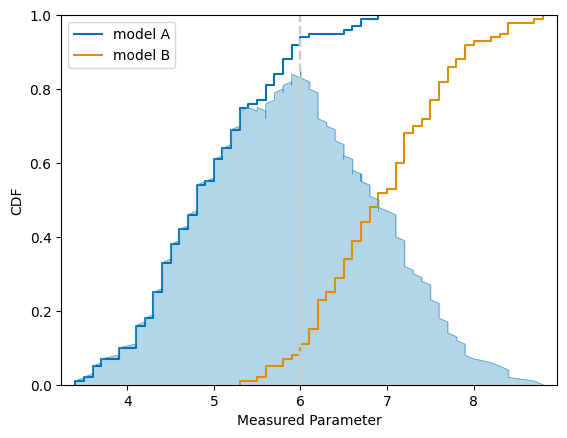

In [7]:
FR.visualize_score(model_A, model_B)